# MNIST digits classification with Keras



In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)
import keras
print("We are using Keras", keras.__version__)


We're using TF 2.5.0
We are using Keras 2.5.0


# Look at the data

In this task we have 50000 28x28 images of digits from 0 to 9.
We will train a classifier on this data.

In [2]:
from keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.18, random_state=0)

In [ ]:
X_train.shape

(49200, 28, 28)

In [ ]:
X_val.shape

(10800, 28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  13, 204, 197,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 188, 253, 196,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  67, 246, 194,  43,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  26, 210, 252, 113,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

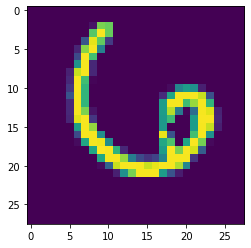

In [ ]:
plt.figure()
plt.imshow(X_train[0])

plt.grid(False)
plt.show()

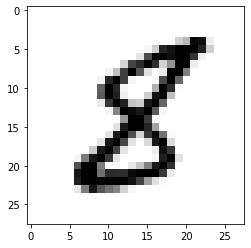

In [ ]:
plt.figure()
plt.imshow(X_train[2],cmap="Greys")

plt.grid(False)
plt.show()

X_train [shape (49200, 28, 28)] sample patch:
 [[  0   0   0 161 253]
 [  0   0   0  36 190]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
A closeup of a sample patch:


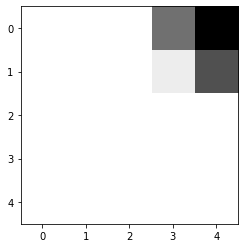

And the whole sample:


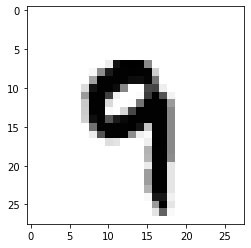

y_train [shape (49200,)] 10 samples:
 [6 9 8 3 7 6 2 4 7 9]


In [ ]:
# X contains rgb values divided by 255
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
plt.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
plt.show()
print("And the whole sample:")
plt.imshow(X_train[1], cmap="Greys")
plt.show()
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])

In [ ]:
'''
# flatten images
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print(X_train_flat.shape)

X_val_flat = X_val.reshape((X_val.shape[0], -1))
print(X_val_flat.shape)
'''

(50000, 784)
(10000, 784)


In [ ]:
'''
# one-hot encode the target
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:3], y_train[:3])
'''

(50000, 10)
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]] [5 0 4]


In [ ]:
'''
# building a model with keras
from keras.layers import Dense, Activation
from keras.models import Sequential

# we still need to clear a graph though
s = reset_tf_session()

model = Sequential()  # it is a feed-forward network without loops like in RNN
model.add(Dense(256, input_shape=(784,)))  # the first layer must specify the input shape (replacing placeholders)
model.add(Activation('sigmoid'))
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
'''

In [ ]:
'''
# you can look at all layers and parameter count
model.summary()

'''

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
'''
# now we "compile" the model specifying the loss and optimizer
model.compile(
    loss='categorical_crossentropy', # this is our cross-entropy
    optimizer='adam',
    metrics=['accuracy']  # report accuracy during training
)
'''

In [ ]:
'''
# and now we can fit the model with model.fit()
# and we don't have to write loops and batching manually as in TensorFlow
model.fit(
    X_train_flat, 
    y_train_oh,
    batch_size=512, 
    epochs=40,
    validation_data=(X_val_flat, y_val_oh),
    callbacks=[keras_utils.TqdmProgressCallback()],
    verbose=0
)
'''


Epoch 1/40


A Jupyter Widget



Epoch 2/40


A Jupyter Widget



Epoch 3/40


A Jupyter Widget



Epoch 4/40


A Jupyter Widget



Epoch 5/40


A Jupyter Widget



Epoch 6/40


A Jupyter Widget



Epoch 7/40


A Jupyter Widget



Epoch 8/40


A Jupyter Widget



Epoch 9/40


A Jupyter Widget



Epoch 10/40


A Jupyter Widget



Epoch 11/40


A Jupyter Widget



Epoch 12/40


A Jupyter Widget



Epoch 13/40


A Jupyter Widget



Epoch 14/40


A Jupyter Widget



Epoch 15/40


A Jupyter Widget



Epoch 16/40


A Jupyter Widget



Epoch 17/40


A Jupyter Widget



Epoch 18/40


A Jupyter Widget



Epoch 19/40


A Jupyter Widget



Epoch 20/40


A Jupyter Widget



Epoch 21/40


A Jupyter Widget



Epoch 22/40


A Jupyter Widget



Epoch 23/40


A Jupyter Widget



Epoch 24/40


A Jupyter Widget



Epoch 25/40


A Jupyter Widget



Epoch 26/40


A Jupyter Widget



Epoch 27/40


A Jupyter Widget



Epoch 28/40


A Jupyter Widget



Epoch 29/40


A Jupyter Widget



Epoch 30/40


A Jupyter Widget



Epoch 31/40


A Jupyter Widget



Epoch 32/40


A Jupyter Widget



Epoch 33/40


A Jupyter Widget



Epoch 34/40


A Jupyter Widget



Epoch 35/40


A Jupyter Widget



Epoch 36/40


A Jupyter Widget



Epoch 37/40


A Jupyter Widget



Epoch 38/40


A Jupyter Widget



Epoch 39/40


A Jupyter Widget



Epoch 40/40


A Jupyter Widget

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='sigmoid'),  # hidden layer (2)
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='sigmoid'),  # hidden layer (3)
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax') # output layer (4)
])

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
EPOCHS = 100
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)


Epoch 1/100
769/769 [==============================] - 6s 7ms/step - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.1518 - val_accuracy: 0.9735
Epoch 2/100
769/769 [==============================] - 5s 7ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.1614 - val_accuracy: 0.9740
Epoch 3/100
769/769 [==============================] - 5s 7ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.1744 - val_accuracy: 0.9705
Epoch 4/100
769/769 [==============================] - 5s 7ms/step - loss: 0.0107 - accuracy: 0.9962 - val_loss: 0.1629 - val_accuracy: 0.9695
Epoch 5/100
769/769 [==============================] - 5s 7ms/step - loss: 0.0096 - accuracy: 0.9965 - val_loss: 0.1614 - val_accuracy: 0.9730
Epoch 6/100
769/769 [==============================] - 5s 7ms/step - loss: 0.0073 - accuracy: 0.9974 - val_loss: 0.1816 - val_accuracy: 0.9708
Epoch 7/100
769/769 [==============================] - 5s 7ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.1593 - val_accuracy: 0.9726

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

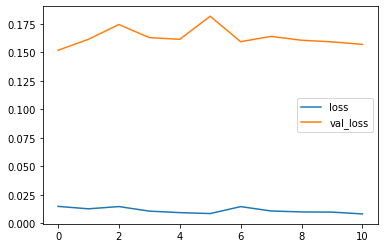

In [ ]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.columns


Minimum Validation Loss: 0.1518
Minimum Validation cross entropy: 0.9695


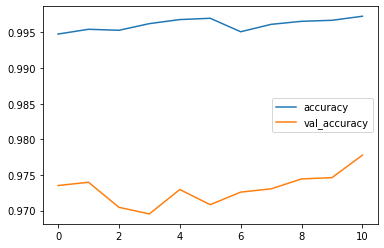

In [ ]:
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print(("Minimum Validation cross entropy: {:0.4f}").format(history_df['val_accuracy'].min()))

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1604 - accuracy: 0.9719
Test accuracy: 0.9718999862670898


In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions[0]

array([6.6713022e-09, 1.9794080e-09, 8.3615299e-07, 6.8315404e-07,
       3.8219328e-10, 1.7022784e-07, 4.4639075e-09, 9.9999821e-01,
       4.4876654e-09, 7.5154581e-08], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
y_test[0]

7

In [ ]:
predictions[3]

array([9.9998581e-01, 1.0379584e-07, 4.1283511e-06, 8.9931696e-08,
       9.8560667e-11, 1.6727293e-08, 9.6541817e-06, 1.5459828e-07,
       9.2949481e-10, 3.3790513e-08], dtype=float32)

In [ ]:
np.argmax(predictions[3])

0

In [ ]:
y_test[3]

0

# Here're the notes for those who want to play around here

Here are some tips on what you could do:

 * __Network size__
   * More neurons, 
   * More layers, ([docs](https://keras.io/))

   * Other nonlinearities in the hidden layers
     * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum
     

 * __Faster optimization__
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs


 * __Regularize__ to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
     * Can be done manually or via - https://keras.io/regularizers/
   
   
 * __Data augmemntation__ - getting 5x as large dataset for free is a great deal
   * https://keras.io/preprocessing/image/
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.